## Exploring The Data

In [2]:
import pandas as pd

avengers = pd.read_csv("avengers.csv")
avengers.head(5)

,URL,Name/Alias,Appearances,Current?,Gender,Probationary Introl,Full/Reserve Avengers Intro,Year,Years since joining,Honorary,...,Return1,Death2,Return2,Death3,Return3,Death4,Return4,Death5,Return5,Notes
0,http://marvel.wikia.com/Henry_Pym_(Earth-616),"Henry Jonathan ""Hank"" Pym",1269,YES,MALE,NaN,Sep-63,1963,52,Full,...,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Merged with Ultron in Rage of Ultron Vol. 1. A...
1,http://marvel.wikia.com/Janet_van_Dyne_(Earth-...,Janet van Dyne,1165,YES,FEMALE,NaN,Sep-63,1963,52,Full,...,YES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dies in Secret Invasion V1:I8. Actually was se...
2,http://marvel.wikia.com/Anthony_Stark_(Earth-616),"Anthony Edward ""Tony"" Stark",3068,YES,MALE,NaN,Sep-63,1963,52,Full,...,YES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Death: ""Later while under the influence of Imm..."
3,http://marvel.wikia.com/Robert_Bruce_Banner_(E...,Robert Bruce Banner,2089,YES,MALE,NaN,Sep-63,1963,52,Full,...,YES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Dies in Ghosts of the Future arc. However ""he ..."
4,http://marvel.wikia.com/Thor_Odinson_(Earth-616),Thor Odinson,2402,YES,MALE,NaN,Sep-63,1963,52,Full,...,YES,YES,NO,NaN,NaN,NaN,NaN,NaN,NaN,Dies in Fear Itself brought back because that'...


## Filter Out The Bad Years

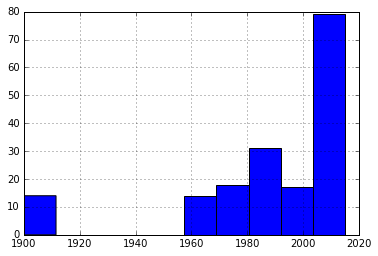

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
true_avengers = pd.DataFrame()

avengers['Year'].hist()

Some Avengers seem to be born in 1900, but the Avengers comic series started in the 1960's. All Avengers born before the 1960's need to be removed.

In [24]:
true_avengers = avengers.loc[avengers['Year'] > 1960, :]

## Consolidating Deaths

Right now, the data frame contains 5 fields for possible deaths. We want only one column, containing every death.

In [26]:
import numpy as np

def is_death(item):
    if item.isnull():
        return 0
    elif item == "YES":
        return 1
    else:
        return 0

columns = ['Death1', 'Death2', 'Death3', 'Death4', 'Death5']
death_frame = true_avengers.loc[:, columns]
death_frame.fillna(value="NO", inplace=True)
death_frame.replace(to_replace=["NO", "YES"], value=[0, 1], inplace=True)
true_avengers['Deaths'] = death_frame.apply(np.sum, axis = 1)

/Users/jannabrettingen/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


## Years Since Joining

In [29]:
correct_year_since_joining = true_avengers[2015 - true_avengers['Years since joining'] == true_avengers['Year']]
joined_accuracy_count = correct_year_since_joining.shape[0]
print(joined_accuracy_count)

159


159 times the years since joining were correctly calculated.